# Sinusoide rectificada media onda

En esta tarea deberá:

* generar una función que devuelva la forma de onda en el tiempo de una sinusoide rectificada media onda
    
    * Partirá de una sinusoide (OJO! : **NO de un coseno** )
    
    * Anulará la parte negativa de la misma

* A partir de los coeficientes del espectro bilateral, generará las distintas componentes cosenoidales y obtendrá aproximaciones a la señal con distinto número de armónicos

<img src="images/c_n_rectific_media_onda.png" width=400>

## Cuestiones

¿Cuánto vale $c_{-1}$ ?



¿Cuánto vale la fase de $c_{1}$ ?





------------------------------------

----------------------------------

In [5]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


import math

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Copiar del cuaderno de clase

def sumaTonos(espectro,t):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    Devuelve un array de numpy con tantas columnas como elementos tenga el espectro
    Cada una de ellas es una componente frecuencial
    
    La señal suma se puede obtener haciendo np.sum(out,axis=1)
    '''
    
    # La señal suma se puede obtener haciendo np.sum(,axis=1)
    
      
    ncomponentes = len(espectro)
    out=np.zeros((t.size,ncomponentes))
    for k in range(ncomponentes):
        frecuencia = espectro[k][0]
        amplitud = espectro[k][1]
        fase = espectro[k][2]      
        out [:,k]= amplitud * np.cos(2*math.pi*frecuencia*t + fase)
    return out

In [15]:
# Copiar del cuaderno de clase
def plot_espectro_amplitud(espectro):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    '''
    ncompo = len(espectro)
    amplitudes = np.zeros(ncompo)
    frecuencias = np.zeros(ncompo)
    for k in range(ncompo):
        amplitudes[k] = espectro[k][1]
        frecuencias[k] = espectro[k][0]
    amplitudes=np.absolute(amplitudes)
    _=plt.stem(frecuencias,np.abs(amplitudes), markerfmt=" ")
    _=plt.title('Espectro de amplitud')
    _=plt.xlabel('frecuencia')
    _=plt.xlim([-0.1*np.max(frecuencias),1.2*np.max(frecuencias)]) 
    _=plt.grid()

## Creación de una función que devuelva la señal en el tiempo

Se sugiere basarse en seno_fullRectified() de la práctica

In [6]:
def seno_halfRectified(frecuencia,tiempo):
    #Genera una onda cuadrada "analogica"
    # Internamente genera una sinusoide y pone a 1 los valores positivos y a cero los negativos
    z=np.sin(2*math.pi*frecuencia*tiempo);
    z[z<0]=0
    return z

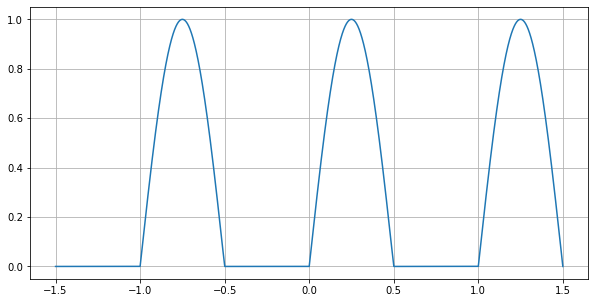

In [7]:
# Comprobación
frec = 1
t=np.linspace(-1.5,1.5,50000)
s=seno_halfRectified(frec,t)
_=plt.plot(t,s)
_=plt.grid()

## Creación de una función que devuelva el espectro unilateral de la sinusoide rectificada media onda.

Aspectos a tener en cuenta:

* Las amplitudes serán valores >= 0

* Si al aplicar la fórmula salen valores negativos, la amplitud se considerará el módulo (es decir un valor positivo) y a la fase se le sumará $\pi$

* Recuerda que la expresión dada corresponde al **espectro bilateral**, mientras que la función pedida devolverá el espectro **unilateral** es decir, amplitudes y fases de cosenos.



In [54]:
def espectro_seno_rectificado_media(numcomponentes,f0):

    '''
    Función que devuelve el espectro unilateral de una onda senoidal rectificada media onda como
    lista de tuplas (frec,ampl,fase)
    '''
    ks=np.arange(numcomponentes)
    frecuencias =ks*f0
    
    A= 1
    amplitudes = 0.0*ks # Todo ceros de momento
    fases=ks*0.0 # De momento

    pares =np.arange(0,numcomponentes,2)
   
    amplitudes[::2] = A/math.pi/(1-pares**2)
    amplitudes[1] = A/4
    
    amplitudes[1:] *=2
    fases[1] =  -math.pi/2
    
    # Eliminar amplitudes negativas    
    fases[amplitudes < 0 ] = fases[amplitudes < 0] + math.pi
    amplitudes = np.abs(amplitudes)
   
  
    espectro=[]
    for k in ks:
        componente=(frecuencias[k],amplitudes[k],fases[k])
        espectro.append(componente)
    return espectro

### Comprobación

* Se representará el espectro de amplitud. Debe observarse que decrece a medida que aumenta la frecuencia

* Se determinará la aproximación con 1 y 8 armónicos

  * Se visualizará la señal suma
  
  * Las diferentes sinusoides.

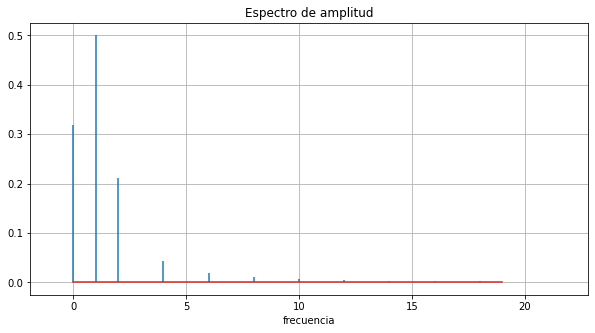

In [55]:
espectro_seno_rect=espectro_seno_rectificado_media(20,1)

plot_espectro_amplitud(espectro_seno_rect)


In [56]:
stonos = sumaTonos(espectro_seno_rect,t)
rec1=np.sum(stonos[:,0:2],axis=1)
rec8=np.sum(stonos[:,0:9],axis=1)

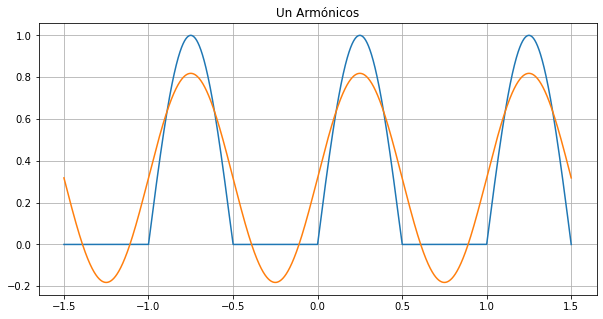

In [57]:
_=plt.plot(t,s)
_=plt.plot(t,rec1)
_=plt.title('Un Armónicos')
_=plt.grid()

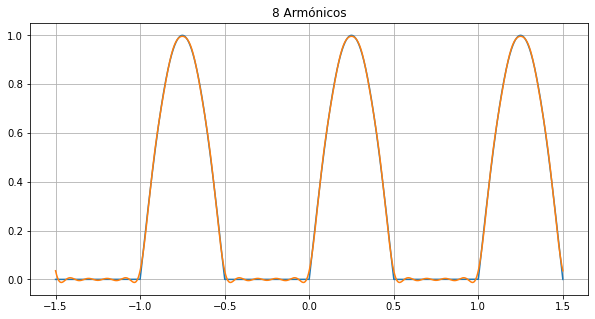

In [58]:
_=plt.plot(t,s)
_=plt.plot(t,rec8)
_=plt.title('8 Armónicos')
_=plt.grid()

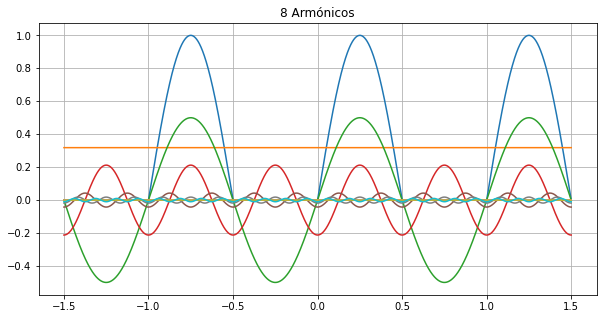

In [60]:
_=plt.plot(t,s)
_=plt.plot(t,stonos[:,0:9])
_=plt.title('8 Armónicos')
_=plt.grid()

## Determinar el error cuadrático medio al aproximar

* Con 1 armónico

* Con hasta el armónico 8

In [61]:
E1 = np.mean((s-rec1)**2)
E8 = np.mean((s-rec8)**2)

In [62]:
print('Error 1 armonico:',E1)
print('Error 8 armonico:',E8)

Error 1 armonico: 0.023680369271675918
Error 8 armonico: 4.5910515628175885e-05


**Cuestión**
Indique cuál de los dos errores es menor y explique por qué?

# Espectro de retrasar una señal

Como es sabido de teoría, al retrasar una señal $t_0$, su espectro:

* Las frecuencias de las componentes espectrales no cambian.

* De amplitud no cambia.

* Cada una de las componentes espectrales ve modificada su fase por un término $\phi _k \rightarrow \phi _k - 2 \pi f _k t_0$

En este apartado se pide implementar una función que dado un espectro determine el espectro de la señal retrasada.

In [63]:
def espectro_retraso(espectro,t0):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    t0: retardo
    Devuelve: el espectro correspondiente a la señal de salida
    '''
    
    # La señal suma se puede obtener haciendo np.sum(,axis=1)
    
      
    ncomponentes = len(espectro)
    out=[]
    for k in range(ncomponentes):
        frecuencia = espectro[k][0]
        amplitud = espectro[k][1]
        fase = espectro[k][2]      
        fase -= 2 * math.pi * frecuencia * t0
        out.append( (frecuencia, amplitud, fase) )
    return out

## Comprobación 

* Obtenga el espectro de la señal rectificada media onda y retrasada $t_0 = 0.25$

* Usando la función sumaTonos() obtenga la señal a partir del espectro y compruebe si efectivamente corresponde a la señal original retrasada $t_0 = 0.25$

In [65]:
t0 = 0.25
espec_retrasada = espectro_retraso(espectro_seno_rect,t0)
print(espec_retrasada[:10])# Primeros 10 valores

[(0, 0.3183098861837907, 0.0), (1, 0.5, -3.141592653589793), (2, 0.2122065907891938, 0.0), (3, 0.0, -4.71238898038469), (4, 0.04244131815783876, -3.141592653589793), (5, 0.0, -7.853981633974483), (6, 0.01818913635335947, -6.283185307179586), (7, 0.0, -10.995574287564276), (8, 0.010105075751866371, -9.42477796076938), (9, 0.0, -14.137166941154069)]


In [67]:
stonos2 = sumaTonos(espec_retrasada,t)
sretr = np.sum(stonos2,axis=1)

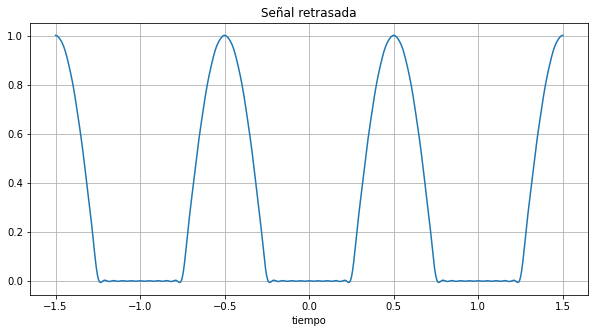

In [69]:
_=plt.plot(t,sretr)
_=plt.title('Señal retrasada')
_=plt.xlabel('tiempo');
_=plt.grid()

**Observaciones**

Note que lo que antes sucedía en t=0 , ahora sucede en t=0.25